In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import FileLink
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Exploring just the 2018 case data
# ---------- do not run this part if you want all case data cleaned --------

### ---------Creating the case data merged with criminal and bailable data--------------
### Joining the raw case data with the case meta data(criminal,bailable_ipc)


In [3]:
# merging the data

cases=pd.read_csv('/kaggle/input/indian-courtcase-data/cases/cases/cases_2018.csv',index_col='ddl_case_id',usecols=['ddl_case_id','date_of_filing','date_of_decision'],dtype={'ddl_case_id':'str','date_of_filing':'str','date_of_decision':'str'})
print(cases.shape)
criminal_data=pd.read_csv('/kaggle/input/indian-courtcase-data/acts_sections/acts_sections.csv',index_col='ddl_case_id',usecols=['ddl_case_id','criminal','bailable_ipc'],dtype={'ddl_case_id':'str','criminal':'str','bailable_ipc':'str'})
pd.merge(cases,criminal_data,left_index=True,right_index=True).to_csv('/kaggle/working/criminalCaseData2018.csv')

(13724299, 2)


In [4]:
criminalCaseData=pd.read_csv('/kaggle/working/criminalCaseData2018.csv')
print(criminalCaseData.shape)
criminalCaseData.head(10)

(12918653, 5)


,ddl_case_id,date_of_filing,date_of_decision,bailable_ipc,criminal
0,01-01-01-201900000012018,2018-01-01,2018-02-07,NaN,0
1,01-01-01-201900000022018,2018-01-01,2018-02-01,NaN,1
2,01-01-01-201900000032018,2018-01-01,2018-02-01,NaN,1
3,01-01-01-201900000042018,2018-01-01,2018-02-01,NaN,1
4,01-01-01-201900000052018,2018-01-01,2018-01-09,NaN,1
5,01-01-01-201900000062018,2018-01-01,NaN,NaN,1
6,01-01-01-201900000072018,2018-01-02,2018-02-05,NaN,0
7,01-01-01-201900000082018,2018-01-03,NaN,NaN,1
8,01-01-01-201900000092018,2018-01-05,2018-08-13,NaN,0
9,01-01-01-201900000102018,2018-01-06,2018-04-09,NaN,0


In [5]:
os.chdir('/kaggle/working')
FileLink('criminalCaseData2018.csv')

/kaggle/working/criminalCaseData2018.csv

### Freeing up memory

In [6]:
import gc

In [7]:
del cases
del criminal_data
gc.collect()

318

### Cleaning the merged data

#### Removing NaN in dates

In [8]:
criminalCaseData.set_index('ddl_case_id',inplace=True)

In [13]:
# remving NaN since if either is NaN the row is useless since we cant calculate duration

cleanedCriminalCaseData=criminalCaseData.dropna(subset=['date_of_filing','date_of_decision'])
print(temp.shape)

(6803151, 4)


In [14]:
cleanedCriminalCaseData.head(10)

,date_of_filing,date_of_decision,bailable_ipc,criminal
ddl_case_id,,,,
01-01-01-201900000012018,2018-01-01,2018-02-07,NaN,0
01-01-01-201900000022018,2018-01-01,2018-02-01,NaN,1
01-01-01-201900000032018,2018-01-01,2018-02-01,NaN,1
01-01-01-201900000042018,2018-01-01,2018-02-01,NaN,1
01-01-01-201900000052018,2018-01-01,2018-01-09,NaN,1
01-01-01-201900000072018,2018-01-02,2018-02-05,NaN,0
01-01-01-201900000092018,2018-01-05,2018-08-13,NaN,0
01-01-01-201900000102018,2018-01-06,2018-04-09,NaN,0
01-01-01-201900000122018,2018-01-08,2018-02-14,NaN,0


### Calculating the duration of the case

In [25]:
cleanedCriminalCaseData['duration']=(pd.to_datetime(cleanedCriminalCaseData['date_of_decision'],format='%Y-%m-%d',errors='coerce')-pd.to_datetime(cleanedCriminalCaseData['date_of_filing'],format='%Y-%m-%d',errors='coerce')).dt.days

In [26]:
cleanedCriminalCaseData.head(10)

,date_of_filing,date_of_decision,bailable_ipc,criminal,duration
ddl_case_id,,,,,
01-01-01-201900000012018,2018-01-01,2018-02-07,NaN,0,37.0
01-01-01-201900000022018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000032018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000042018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000052018,2018-01-01,2018-01-09,NaN,1,8.0
01-01-01-201900000072018,2018-01-02,2018-02-05,NaN,0,34.0
01-01-01-201900000092018,2018-01-05,2018-08-13,NaN,0,220.0
01-01-01-201900000102018,2018-01-06,2018-04-09,NaN,0,93.0
01-01-01-201900000122018,2018-01-08,2018-02-14,NaN,0,37.0


### Cleaning wrong duration data

In [3]:
# removing NaN in duration

print(cleanedCriminalCaseData.shape)
cleanedCriminalCaseData=cleanedCriminalCaseData.dropna(subset=['duration'])
print(cleanedCriminalCaseData.shape)

(6803151, 5)
(6803147, 5)


In [4]:
cleanedCriminalCaseData.head()

,date_of_filing,date_of_decision,bailable_ipc,criminal,duration
ddl_case_id,,,,,
01-01-01-201900000012018,2018-01-01,2018-02-07,NaN,0,37.0
01-01-01-201900000022018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000032018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000042018,2018-01-01,2018-02-01,NaN,1,31.0
01-01-01-201900000052018,2018-01-01,2018-01-09,NaN,1,8.0


<AxesSubplot:xlabel='duration', ylabel='Density'>

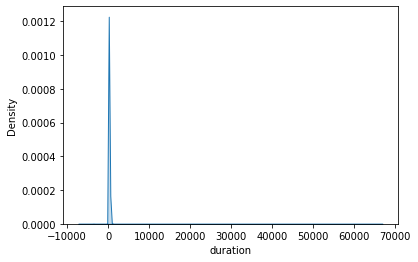

In [5]:
# plotting the different durations of the data to detect wrong durations
sns.kdeplot(data=cleanedCriminalCaseData,x=cleanedCriminalCaseData['duration'],shade=True)

In [6]:
# we see that there are very unreal durations which are clearly wrong
# remving them

display(cleanedCriminalCaseData[cleanedCriminalCaseData['duration']>10000])
display(cleanedCriminalCaseData[cleanedCriminalCaseData['duration']<(-5000)])

,date_of_filing,date_of_decision,bailable_ipc,criminal,duration
ddl_case_id,,,,,
04-07-29-206628000342018,2018-02-28,2048-04-08,bailable,1,10997.0
09-04-15-252800001382018,2018-01-11,2108-01-08,NaN,1,32868.0
09-20-15-252800004552018,2018-02-06,2108-02-05,NaN,1,32870.0
12-06-06-224400000042018,2018-11-30,2109-12-21,NaN,1,33258.0
13-12-03-201400002402018,2018-05-24,2048-05-24,NaN,1,10958.0
13-27-03-202021056702018,2018-06-15,2108-06-23,NaN,0,32880.0
18-22-01-206900000512018,2018-07-06,2048-07-07,NaN,1,10959.0
29-06-15-202100003042018,2018-04-12,2201-06-22,NaN,0,66910.0


,date_of_filing,date_of_decision,bailable_ipc,criminal,duration
ddl_case_id,,,,,
01-20-13-203400010572018,2018-02-17,2003-01-01,NaN,0,-5526.0
03-10-06-205600000232018,2018-04-19,2002-01-01,NaN,0,-5952.0
03-20-11-201200054082018,2018-10-09,1998-10-01,NaN,0,-7313.0
03-20-11-201200054092018,2018-10-09,1998-10-01,NaN,0,-7313.0
03-20-11-201200054102018,2018-10-09,1998-10-01,NaN,0,-7313.0
...,...,...,...,...,...
16-21-06-203800000552018,2018-01-30,1999-11-30,bailable,1,-6636.0
16-21-06-203800000562018,2018-01-30,1999-11-30,bailable,1,-6636.0
16-21-06-203800000572018,2018-01-30,1999-11-30,bailable,1,-6636.0


(6757967, 5)


<AxesSubplot:xlabel='duration', ylabel='Density'>

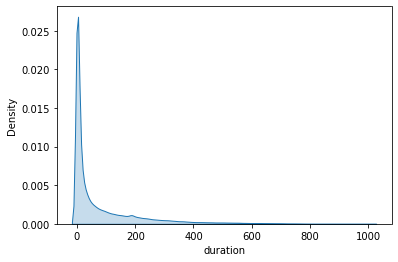

In [7]:
# removing wrong data
# -ve duration and and duration more than 1460(4 years from 2018)
cleanedCriminalCaseData=cleanedCriminalCaseData[((cleanedCriminalCaseData['duration']>=0) & (cleanedCriminalCaseData['duration']<=1460))]
print(cleanedCriminalCaseData.shape)
sns.kdeplot(data=cleanedCriminalCaseData,x=cleanedCriminalCaseData['duration'],shade=True)

In [9]:
cleanedCriminalCaseData.to_csv('/kaggle/working/cleanedCriminalCaseData2018.csv')
os.chdir('/kaggle/working')
FileLink('cleanedCriminalCaseData2018.csv')

/kaggle/working/cleanedCriminalCaseData2018.csv

### The cleanedCriminalCaseData2018.csv file is cleaned of NaN values in the dates,duration and wrong and invalid dates and durations

# ----- Run this part to clean all year cases -----

In [2]:
criminal_data=pd.read_csv('/kaggle/input/indian-courtcase-data/acts_sections/acts_sections.csv',index_col='ddl_case_id',usecols=['ddl_case_id','criminal','bailable_ipc'],dtype={'ddl_case_id':'str','criminal':'str','bailable_ipc':'str'})

for i in range(0,8):
    # merging the data

    cases=pd.read_csv('/kaggle/input/indian-courtcase-data/cases/cases/cases_201%d.csv'%i,index_col='ddl_case_id',usecols=['ddl_case_id','date_of_filing','date_of_decision'],dtype={'ddl_case_id':'str','date_of_filing':'str','date_of_decision':'str'})
    #print(cases.shape)
    criminalCaseData=pd.merge(cases,criminal_data,left_index=True,right_index=True)
    del cases
    gc.collect()
    
    # remving NaN since if either is NaN the row is useless since we cant calculate duration

    cleanedCriminalCaseData=criminalCaseData.dropna(subset=['date_of_filing','date_of_decision'])
    cleanedCriminalCaseData['duration']=(pd.to_datetime(cleanedCriminalCaseData['date_of_decision'],format='%Y-%m-%d',errors='coerce')-pd.to_datetime(cleanedCriminalCaseData['date_of_filing'],format='%Y-%m-%d',errors='coerce')).dt.days
    cleanedCriminalCaseData=cleanedCriminalCaseData.dropna(subset=['duration'])
    cleanedCriminalCaseData=cleanedCriminalCaseData[((cleanedCriminalCaseData['duration']>=0) & (cleanedCriminalCaseData['duration']<=(365*(22-(10+i)))))]
    cleanedCriminalCaseData.to_csv('/kaggle/working/cleanedCriminalCaseData201%d.csv'%i)
    del cleanedCriminalCaseData
    del criminalCaseData
    gc.collect()
    print('processed 201%d'%i)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


processed 2010
processed 2011
processed 2012
processed 2013
processed 2014
processed 2015
processed 2016
processed 2017


In [3]:
for i in range(0,8):
    os.chdir('/kaggle/working')
    display(FileLink('cleanedCriminalCaseData201%d.csv'%i))

/kaggle/working/cleanedCriminalCaseData2010.csv

/kaggle/working/cleanedCriminalCaseData2011.csv

/kaggle/working/cleanedCriminalCaseData2012.csv

/kaggle/working/cleanedCriminalCaseData2013.csv

/kaggle/working/cleanedCriminalCaseData2014.csv

/kaggle/working/cleanedCriminalCaseData2015.csv

/kaggle/working/cleanedCriminalCaseData2016.csv

/kaggle/working/cleanedCriminalCaseData2017.csv